In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("gun-violence-data.csv")

In [3]:
data.drop(["incident_url", "address", "congressional_district", "sources", "source_url", "incident_url_fields_missing",
              "location_description", "participant_relationship", "participant_name", "state_house_district",
              "state_senate_district", "notes"], axis=1, inplace=True)

In [4]:
data = data[np.isfinite(data['latitude'])]

In [5]:
data = data[pd.notnull(data['incident_characteristics'])]

In [6]:
data.gun_stolen.fillna("0::Unknown", inplace=True) #clean
data.gun_type.fillna("0::Unknown", inplace=True)
data.participant_age.fillna("0::Unknown", inplace=True)
data.participant_age_group.fillna("0::Unknown", inplace=True) #clean
data.participant_gender.fillna("0::Unknown", inplace=True) #clean
data.participant_status.fillna("0::Unknown", inplace=True)
data.participant_type.fillna("0::Unknown", inplace=True)
data.n_guns_involved.fillna(0, inplace=True)

In [7]:
data['date'] = pd.to_datetime(data['date']) 

In [8]:
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data["weekday"] = data["date"].dt.weekday
data["week"] = data["date"].dt.week
data["quarter"] = data["date"].dt.quarter
data['Day_of_year'] = data.date.dt.dayofyear

In [9]:
def clean_gun_stolen(row) :
    unknownCount = 0
    stolenCount = 0
    notstolenCount = 0
    gunstolen_row_values = []
    
    gunstolen_row = str(row).split("||")
    for x in gunstolen_row :
            gunstolen_row_value = str(x).split("::")
            if len(gunstolen_row_value) > 1 :
                gunstolen_row_values.append(gunstolen_row_value[1])
                if "Stolen" in gunstolen_row_value :
                    stolenCount += 1
                elif "Not-stolen" in gunstolen_row_value :
                    notstolenCount += 1
                else :
                    unknownCount += 1
                    
    return gunstolen_row_values


gunstolenvalues = data.gun_stolen.apply(clean_gun_stolen)
data["gun_stolen_Yes"] = gunstolenvalues.apply(lambda x: x.count("Stolen"))
data["gun_stolen_No"] = gunstolenvalues.apply(lambda x: x.count("Not-stolen"))
del(gunstolenvalues)

In [10]:
def clean_participant_gender(row) :
    gender_row_values = []
    gender_row = str(row).split("||")
    for x in gender_row :
        gender_row_value = str(x).split("::")
        if len(gender_row_value) > 1 :
            gender_row_values.append(gender_row_value[1])
            
    return gender_row_values


participant_genders = data.participant_gender.apply(clean_participant_gender)
data["participant_gender_total"] = participant_genders.apply(lambda x: len(x))
data["participant_gender_male"] = participant_genders.apply(lambda x: x.count("Male"))
data["participant_gender_female"] = participant_genders.apply(lambda x: x.count("Female"))
del(participant_genders)

In [11]:
def clean_participant_age_group(row) :
    unknownCount = 0
    childCount = 0
    teenCount = 0
    adultCount = 0
    agegroup_row_values = []
    
    agegroup_row = str(row).split("||")
    for x in agegroup_row :
        agegroup_row_value = str(x).split("::")
        if len(agegroup_row_value) > 1 :
            agegroup_row_values.append(agegroup_row_value[1])
            if "Child 0-11" in agegroup_row_value :
                childCount += 1
            elif "Teen 12-17" in agegroup_row_value :
                teenCount += 1
            elif "Adult 18+" in agegroup_row_value :
                adultCount += 1
            else :
                unknownCount += 1
                
    return agegroup_row_values

agegroupvalues = data.participant_age_group.apply(clean_participant_age_group)
data["agegroup_child"] = agegroupvalues.apply(lambda x: x.count("Child 0-11"))
data["agegroup_teen"] = agegroupvalues.apply(lambda x: x.count("Teen 12-17"))
data["agegroup_adult"] = agegroupvalues.apply(lambda x: x.count("Adult 18+"))
del(agegroupvalues)

In [12]:
data.head(50)

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,quarter,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,0::Unknown,0::Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,1,1,0,0,4,3,1,0,0,5
1,460726,2013-01-01,California,Hawthorne,1,3,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,1,1,0,0,1,1,0,0,0,4
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,1,1,0,0,5,5,0,0,0,5
3,478925,2013-01-05,Colorado,Aurora,4,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,1,5,0,0,4,3,1,0,0,4
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,1,7,0,0,4,2,2,0,1,3
5,478948,2013-01-07,Oklahoma,Tulsa,4,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Hom...",36.2405,...,1,7,0,0,6,2,4,0,0,6
6,479363,2013-01-19,New Mexico,Albuquerque,5,0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",34.9791,...,1,19,0,0,6,3,3,3,1,2
7,479374,2013-01-21,Louisiana,New Orleans,0,5,0::Unknown,0::Unknown,Shot - Wounded/Injured||Drive-by (car to stree...,29.9435,...,1,21,0,0,5,5,0,0,0,0
8,479389,2013-01-21,California,Brentwood,0,4,0::Unknown,0::Unknown,Shot - Wounded/Injured||Drive-by (car to stree...,37.9656,...,1,21,0,0,5,5,0,0,3,1
9,492151,2013-01-23,Maryland,Baltimore,1,6,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.2899,...,1,23,0,0,1,1,0,0,1,6


In [13]:
data.shape

(231432, 32)

In [14]:
data.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,weekday,...,quarter,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
count,2.314320e+05,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,...,231432.000000,231432.000000,231432.000000,231432.00000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000
mean,5.517532e+05,0.246889,0.494059,37.546385,-89.338708,0.787428,15.762755,6.300758,2015.685156,3.056980,...,2.440769,176.384186,0.071723,0.00767,1.590839,1.261360,0.175918,0.018589,0.104502,1.247101
std,2.925288e+05,0.519319,0.731467,5.131248,14.363537,3.686783,8.830251,3.436619,1.225562,2.023258,...,1.113575,105.026273,0.903420,0.12997,1.038363,1.069602,0.453806,0.168104,0.412145,1.145302
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,0.000000,1.000000,1.000000,2013.000000,0.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.010558e+05,0.000000,0.000000,33.903250,-94.160350,0.000000,8.000000,3.000000,2015.000000,1.000000,...,1.000000,84.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5.301345e+05,0.000000,0.000000,38.570100,-86.247850,1.000000,16.000000,6.000000,2016.000000,3.000000,...,2.000000,176.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,8.123938e+05,0.000000,1.000000,41.435400,-80.045700,1.000000,23.000000,9.000000,2017.000000,5.000000,...,3.000000,265.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000
max,1.083466e+06,50.000000,53.000000,71.336800,97.433100,400.000000,31.000000,12.000000,2018.000000,6.000000,...,4.000000,366.000000,70.000000,25.00000,78.000000,61.000000,23.000000,11.000000,27.000000,103.000000


In [15]:
data.dtypes

incident_id                           int64
date                         datetime64[ns]
state                                object
city_or_county                       object
n_killed                              int64
n_injured                             int64
gun_stolen                           object
gun_type                             object
incident_characteristics             object
latitude                            float64
longitude                           float64
n_guns_involved                     float64
participant_age                      object
participant_age_group                object
participant_gender                   object
participant_status                   object
participant_type                     object
day                                   int64
month                                 int64
year                                  int64
weekday                               int64
week                                  int64
quarter                         

In [16]:
data.isnull().sum()

incident_id                  0
date                         0
state                        0
city_or_county               0
n_killed                     0
n_injured                    0
gun_stolen                   0
gun_type                     0
incident_characteristics     0
latitude                     0
longitude                    0
n_guns_involved              0
participant_age              0
participant_age_group        0
participant_gender           0
participant_status           0
participant_type             0
day                          0
month                        0
year                         0
weekday                      0
week                         0
quarter                      0
Day_of_year                  0
gun_stolen_Yes               0
gun_stolen_No                0
participant_gender_total     0
participant_gender_male      0
participant_gender_female    0
agegroup_child               0
agegroup_teen                0
agegroup_adult               0
dtype: i

In [25]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,weekday,week,quarter,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
incident_id,1,0.00404716,0.0101705,0.0193502,-0.0169783,0.111376,0.0147328,0.0493219,0.963773,-0.00392271,0.0445249,0.0419701,0.0513137,0.0366232,-0.0122998,-0.0273263,-0.0240565,-0.0240479,-0.023077,0.00947474,-0.0479336
n_killed,0.00404716,1,-0.119318,-0.0799939,-0.0621116,-0.0222636,0.000631959,-0.00472769,0.00271943,0.0225945,-0.00584904,-0.00666966,-0.00463018,-0.0337276,0.000753626,0.233127,0.201346,0.205723,0.0713171,0.0261837,0.277248
n_injured,0.0101705,-0.119318,1,-0.0114366,0.0368788,-0.0409994,0.00241286,0.0159446,0.00686654,0.057803,0.0158165,0.0163124,0.0160541,-0.0492032,-0.00699732,0.302204,0.270668,0.16881,0.0609879,0.107256,0.287223
latitude,0.0193502,-0.0799939,-0.0114366,1,-0.0570338,0.00942867,0.00526667,0.0153573,0.0151674,0.0203906,0.0158275,0.0149764,0.0156486,0.0023556,-0.000251128,-0.0439167,-0.0309145,-0.0331014,-0.0186019,-0.0056884,-0.0441777
longitude,-0.0169783,-0.0621116,0.0368788,-0.0570338,1,-0.0170949,0.00458138,0.00655544,-0.0159854,-0.000205922,0.00745019,0.00769391,0.00688121,-0.00341618,-0.00200948,-0.00446896,0.0022963,-0.0160156,-0.00537143,0.00633271,0.00352027
n_guns_involved,0.111376,-0.0222636,-0.0409994,0.00942867,-0.0170949,1,-0.000535882,0.00750213,0.106254,-0.00817916,0.00674379,0.00584234,0.00756789,0.240893,0.0265775,0.0179949,0.00926654,-0.00166979,-0.00418673,-3.11165e-05,0.00860239
day,0.0147328,0.000631959,0.00241286,0.00526667,0.00458138,-0.000535882,1,0.00784366,-0.00437796,-0.000155139,0.0620685,0.00836397,0.0916547,0.000756693,-0.00392269,-0.001151,-0.00179098,0.00186322,-0.00193392,0.00255238,-0.00317949
month,0.0493219,-0.00472769,0.0159446,0.0153573,0.00655544,0.00750213,0.00784366,1,-0.168404,0.00830542,0.96735,0.971029,0.996454,0.00247969,-0.00852125,0.0242231,0.0238993,0.00420925,-0.000612269,0.000677772,0.00509225
year,0.963773,0.00271943,0.00686654,0.0151674,-0.0159854,0.106254,-0.00437796,-0.168404,1,-0.00492653,-0.165911,-0.169115,-0.167022,0.0347296,-0.0100953,-0.0340477,-0.0297851,-0.026856,-0.0230399,0.00919182,-0.0523818
weekday,-0.00392271,0.0225945,0.057803,0.0203906,-0.000205922,-0.00817916,-0.000155139,0.00830542,-0.00492653,1,0.00872296,0.011416,0.00825344,-0.00678172,-0.00249992,0.00565933,0.00488075,0.00408096,-0.000446274,-0.0086435,0.0137362


In [17]:
data.state.value_counts()

Illinois                16814
California              15975
Florida                 14610
Texas                   12980
Ohio                     9816
New York                 9487
Georgia                  8717
Pennsylvania             8568
North Carolina           8458
Louisiana                7727
Tennessee                7360
South Carolina           6743
Missouri                 6442
Massachusetts            5787
Michigan                 5760
Virginia                 5661
Maryland                 5641
Indiana                  5560
Alabama                  5373
New Jersey               5226
Wisconsin                4661
Kentucky                 4005
Mississippi              3495
Oklahoma                 3318
Washington               3309
District of Columbia     3091
Colorado                 3069
Connecticut              2984
Arkansas                 2753
Iowa                     2435
Minnesota                2276
Arizona                  2268
Oregon                   2217
Kansas    

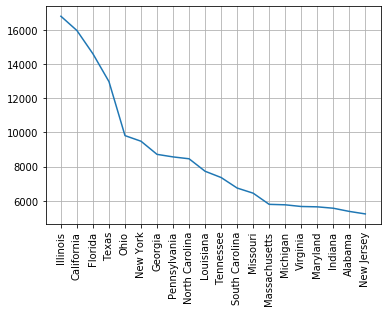

In [18]:
plt.plot(data.state.value_counts().head(20))
plt.xticks(rotation=90)
plt.grid()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

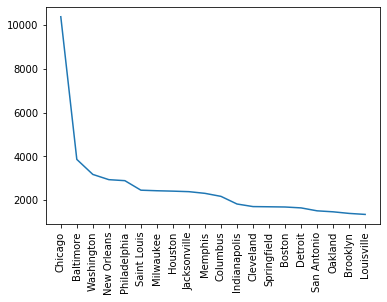

In [19]:
plt.plot(data.city_or_county.value_counts().head(20))
plt.xticks(rotation=90)

In [14]:
#def clean_gun_type(row) :
    HandgunCount = 0
    x9mmCount = 0
    RifleCount = 0
    ShotgunCount = 0
    x22LRCount = 0
    x40SWCount = 0
    x380AutoCount = 0
    x45AutoCount = 0
    x38SPICount = 0
    x223REMCount = 0
    x12gaugeCount = 0
    x7AK47Count = 0
    x357MagCount = 0
    x25AutoCount = 0
    x32AutoCount = 0
    OtherCount = 0
    
    guntype_row_values = []
    
    guntype_row = str(row).split("||")
    for x in guntype_row :
            #print(set(guntype_row))
            guntype_row_value = str(x).split("::")
            #print(set(guntype_row_value))
            if len(guntype_row_value) > 1 :
                guntype_row_values.append(guntype_row_value[1])
                if "Handgun" in guntype_row_value :
                    HandgunCount += 1
                elif "22 LR" in guntype_row_value :
                    x22LRCount += 1
                elif "9mm" in guntype_row_value :
                    x9mmCount += 1
                elif "Rifle" in guntype_row_value :
                    RifleCount += 1
                elif "Shotgun" in guntype_row_value :
                    ShotgunCount += 1
                elif "40 SW" in guntype_row_value :
                    x40SWCount += 1
                elif "380 Auto" in guntype_row_value :
                    x380AutoCount += 1
                elif "45 Auto" in guntype_row_value :
                    x45AutoCount += 1
                elif "38 Spl" in guntype_row_value :
                    x38SPICount += 1
                elif "223 Rem [AR-15]" in guntype_row_value :
                    x223REMCount += 1
                elif "12 gauge" in guntype_row_value :
                    x12gaugeCount += 1
                elif "7.62[AK-47]" in guntype_row_value :
                    x7AK47Count += 1
                elif "357 Mag" in guntype_row_value :
                    x357MagCount += 1
                elif "25 Auto" in guntype_row_value :
                    x25AutoCount += 1
                elif "32 Auto" in guntype_row_value :
                    x32AutoCount += 1
                else :
                    OtherCount += 1
                    
    return guntype_row_values


guntypevalues = data.gun_type.apply(clean_gun_type)
#print(guntypevalues)
data["gun_Handgun"] = guntypevalues.apply(lambda x: x.count("Handgun"))
data["gun_22LR"] = guntypevalues.apply(lambda x: x.count("x22LRCount"))
data["gun_x9mm"] = guntypevalues.apply(lambda x: x.count("9mm"))
data["gun_Rifle"] = guntypevalues.apply(lambda x: x.count("Rifle"))
data["gun_Shotgun"] = guntypevalues.apply(lambda x: x.count("Shotgun"))
data["gun_40SW"] = guntypevalues.apply(lambda x: x.count("x40SWCount"))
data["gun_380Auto"] = guntypevalues.apply(lambda x: x.count("x380AutoCount"))
data["gun_45Auto"] = guntypevalues.apply(lambda x: x.count("x45AutoCount"))
data["gun_S38SPI"] = guntypevalues.apply(lambda x: x.count("x38SPICount"))
data["gun_223REM"] = guntypevalues.apply(lambda x: x.count("x223REMCount"))
data["gun_12gauge"] = guntypevalues.apply(lambda x: x.count("x12gaugeCount"))
data["gun_7AK47"] = guntypevalues.apply(lambda x: x.count("x7AK47Count"))
data["gun_357Mag"] = guntypevalues.apply(lambda x: x.count("x357MagCount"))
data["gun_25Auto"] = guntypevalues.apply(lambda x: x.count("x25AutoCount"))
data["gun_32Auto"] = guntypevalues.apply(lambda x: x.count("x32AutoCount"))
data["gun_Other"] = guntypevalues.apply(lambda x: x.count("OtherCount"))
del(guntypevalues)

0                               []
1                               []
2               [Unknown, Unknown]
3                               []
4               [Handgun, Handgun]
5                               []
6         [22 LR, 223 Rem [AR-15]]
7                               []
8                               []
9                               []
10                       [Unknown]
11                       [Unknown]
12                       [Shotgun]
13                       [Handgun]
14                              []
15                       [Handgun]
16                           m]
17                              []
18                       [Handgun]
19                              []
20                       [45 Auto]
21                              []
22                      [12 gauge]
23                              []
24                              []
25                              []
26                              []
27                              []
28                  [7.

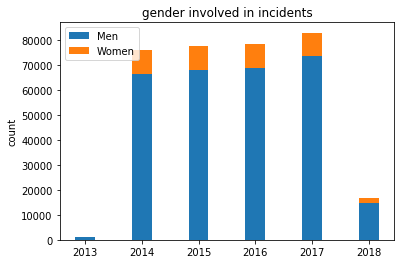

In [16]:
M = 6

m2013 = data[data.year == 2013].participant_gender_male.sum()
f2013 = data[data.year == 2013].participant_gender_female.sum()
m2014 = data[data.year == 2014].participant_gender_male.sum()
f2014 = data[data.year == 2014].participant_gender_female.sum()
m2015 = data[data.year == 2015].participant_gender_male.sum()
f2015 = data[data.year == 2015].participant_gender_female.sum()
m2016 = data[data.year == 2016].participant_gender_male.sum()
f2016 = data[data.year == 2016].participant_gender_female.sum()
m2017 = data[data.year == 2017].participant_gender_male.sum()
f2017 = data[data.year == 2017].participant_gender_female.sum()
m2018 = data[data.year == 2018].participant_gender_male.sum()
f2018 = data[data.year == 2018].participant_gender_female.sum()

maleCount = (m2013, m2014, m2015, m2016, m2017, m2018)
femaleCount = (f2013, f2014, f2015, f2016, f2017, f2018)

ind = np.arange(M)    
width = 0.35       


a1 = plt.bar(ind, maleCount, width)
b1 = plt.bar(ind, femaleCount, width, bottom=maleCount)

plt.ylabel('count')
plt.title('gender involved in incidents')
plt.xticks(ind, ('2013', '2014', '2015', '2016', '2017','2018'))
plt.legend((a1[0], b1[0]),('Men', 'Women'))

plt.show()

Rectangle(xy=(-0.35, 0), width=0.35, height=7948, angle=0)
Rectangle(xy=(0.65, 0), width=0.35, height=7469, angle=0)
Rectangle(xy=(1.65, 0), width=0.35, height=7666, angle=0)
Rectangle(xy=(2.65, 0), width=0.35, height=7338, angle=0)
Rectangle(xy=(3.65, 0), width=0.35, height=7845, angle=0)
Rectangle(xy=(4.65, 0), width=0.35, height=9263, angle=0)
Rectangle(xy=(5.65, 0), width=0.35, height=9609, angle=0)
Rectangle(xy=(2.77556e-17, 0), width=0.35, height=15612, angle=0)
Rectangle(xy=(1, 0), width=0.35, height=14626, angle=0)
Rectangle(xy=(2, 0), width=0.35, height=14665, angle=0)
Rectangle(xy=(3, 0), width=0.35, height=13934, angle=0)
Rectangle(xy=(4, 0), width=0.35, height=14787, angle=0)
Rectangle(xy=(5, 0), width=0.35, height=19872, angle=0)
Rectangle(xy=(6, 0), width=0.35, height=20845, angle=0)


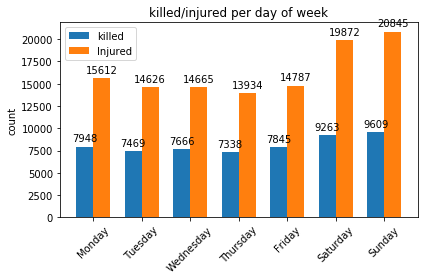

In [61]:
M = 7

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']

mok = data[data.weekday == 0].n_killed.sum()
moi = data[data.weekday == 0].n_injured.sum()
tuk = data[data.weekday == 1].n_killed.sum()
tui = data[data.weekday == 1].n_injured.sum()
wek = data[data.weekday == 2].n_killed.sum()
wei = data[data.weekday == 2].n_injured.sum()
thk = data[data.weekday == 3].n_killed.sum()
thi = data[data.weekday == 3].n_injured.sum()
frk = data[data.weekday == 4].n_killed.sum()
fri = data[data.weekday == 4].n_injured.sum()
sak = data[data.weekday == 5].n_killed.sum()
sai = data[data.weekday == 5].n_injured.sum()
suk = data[data.weekday == 6].n_killed.sum()
sui = data[data.weekday == 6].n_injured.sum()

killedCount = (mok, tuk, wek, thk, frk, sak, suk)
injuredCount = (moi, tui, wei, thi, fri, sai, sui)

ind = np.arange(M)    
width = 0.35       

fig, ax = plt.subplots()
a1 = ax.bar(ind - width/2, killedCount, width)
b1 = ax.bar(ind + width/2, injuredCount, width)

ax.set_ylabel('count')
ax.set_title('killed/injured per day of week')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation=45)
ax.legend((a1[0], b1[0]),('killed', 'Injured'))


def autolabel(x):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in x:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(a1)
autolabel(b1)

fig.tight_layout()

plt.show()

In [ ]:
data2 = data[data.year == 2014]
data2 = data2.append(data[data.year == 2015])
data2 = data2.append(data[data.year == 2016])
data2 = data2.append(data[data.year == 2017])

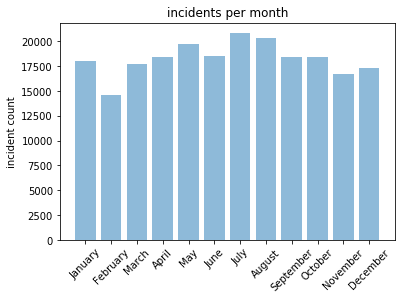

In [18]:
jan = data2[data2.month == 1].month.value_counts()
feb = data2[data2.month == 2].month.value_counts()
mar = data2[data2.month == 3].month.value_counts()
apr = data2[data2.month == 4].month.value_counts()
may = data2[data2.month == 5].month.value_counts()
jun = data2[data2.month == 6].month.value_counts()
jul = data2[data2.month == 7].month.value_counts()
aug = data2[data2.month == 8].month.value_counts()
sep = data2[data2.month == 9].month.value_counts()
octo = data2[data2.month == 10].month.value_counts()
nov = data2[data2.month == 11].month.value_counts()
dec = data2[data2.month == 12].month.value_counts()

Months = ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October','November', 'December')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,17295]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('incident count')
plt.title('incidents per month')

plt.show()

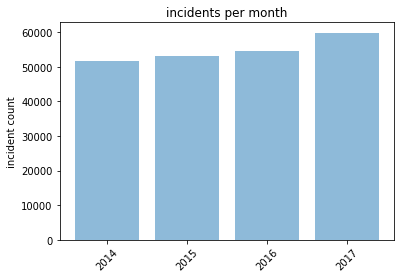

In [46]:
Years = ('2014', '2015', '2016', '2017')
ind = np.arange(len(Years))
incidentCount = [data[data.year == 2014].year.value_counts(),data[data.year == 2015].year.value_counts(),data[data.year == 2016].year.value_counts(),59812]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Years, rotation=45)
plt.ylabel('incident count')
plt.title('incidents per year')

plt.show()

In [43]:
data[data.year == 2017].year.value_counts()

2017    59812
Name: year, dtype: int64

In [58]:
data[data.month == 12].month.value_counts()

12    17295
Name: month, dtype: int64

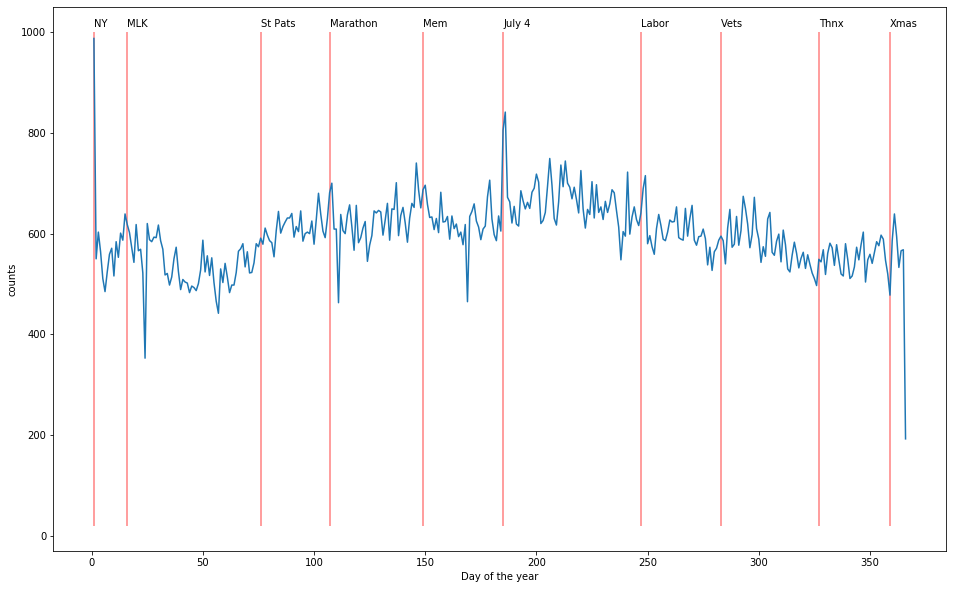

In [23]:
data_holidays = data2.groupby(['Day_of_year']).size().reset_index(name='counts')

holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            data=data_holidays)
plt.xlabel('Day of the year')
plt.vlines(holidays, 20, 1000, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=1010, s=holidays_names[i])

In [35]:
data.sort_values(by='n_killed', ascending=False).head(10)

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,day,month,year,weekday,week,quarter,Day_of_year,participant_gender_total,participant_gender_male,participant_gender_female
130448,577157,2016-06-12,Florida,Orlando,50,53,0::Not-stolen||1::Not-stolen,0::223 Rem [AR-15]||1::9mm,"Shot - Wounded/Injured||Shot - Dead (murder, a...",28.5195,...,12,6,2016,6,23,2,164,78,61,17
217151,980577,2017-11-05,Texas,Sutherland Springs,27,20,0::Unknown||1::Unknown||2::Unknown||3::Unknown,0::223 Rem [AR-15]||1::Rifle||2::9mm||3::22 LR,"Shot - Wounded/Injured||Shot - Dead (murder, a...",29.2733,...,5,11,2017,6,44,4,309,42,19,23
232745,1049217,2018-02-14,Florida,Pompano Beach (Parkland),17,17,0::Not-stolen||1::Not-stolen,0::223 Rem [AR-15]||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",26.3045,...,14,2,2018,2,7,1,45,35,17,18
101531,456893,2015-12-02,California,San Bernardino,16,19,0::Not-stolen||1::Not-stolen||2::Not-stolen||3...,0::223 Rem [AR-15]||1::223 Rem [AR-15]||2::9mm...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",34.0758,...,2,12,2015,2,49,4,336,23,12,11
194,480366,2013-09-16,District of Columbia,Washington Navy Yard,11,3,0::Unknown||1::Unknown,0::9mm||1::Shotgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",38.8730,...,16,9,2013,0,38,3,259,16,11,5
92624,423223,2015-10-01,Oregon,Roseburg,10,9,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,0::223 Rem [AR-15]||1::Handgun||2::Handgun||3:...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",43.2628,...,1,10,2015,3,40,4,274,15,7,8
70511,341622,2015-05-17,Texas,Waco,9,18,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",31.5039,...,17,5,2015,6,20,2,137,9,9,0
207904,930569,2017-09-10,Texas,Plano,9,1,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.0560,...,10,9,2017,6,36,3,253,10,6,4
75530,359830,2015-06-17,South Carolina,Charleston,9,0,0::Unknown,0::45 Auto,"Shot - Dead (murder, accidental, suicide)||Sui...",32.7876,...,17,6,2015,2,25,2,168,10,4,6
122526,545525,2016-04-22,Ohio,Piketon,8,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Spr...",39.0201,...,22,4,2016,4,16,2,113,9,6,3


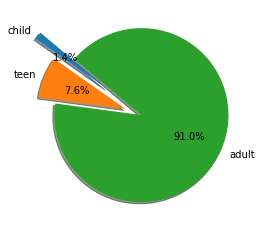

In [59]:
child = data.agegroup_child.sum()
teen = data.agegroup_teen.sum()
adult = data.agegroup_adult.sum()
total = data.shape[0]

labels = 'child', 'teen', 'adult'
sizes = [child/total, teen/total, adult/total]
explode = (0.5, 0.2,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

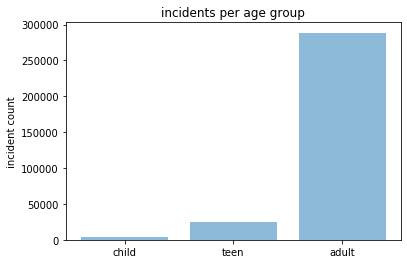

In [73]:
child = data.agegroup_child.sum()
teen = data.agegroup_teen.sum()
adult = data.agegroup_adult.sum()

age = ('child', 'teen', 'adult')
ind = np.arange(len(age))
counts = [child,teen,adult]


plt.bar(ind, counts, align='center', alpha=0.5)
plt.xticks(ind, age)
plt.ylabel('incident count')
plt.title('incidents per age group')


plt.show()